In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import h5py

class simdata:

    def __init__(self, file):

        with h5py.File(file, 'r') as f:
            self.z = f['Header'].attrs['Redshift']
            self.boxsize = f['Header'].attrs['BoxSize']
            self.pos = np.asfarray( f['PartType1']['Coordinates'] )

    def particleDensity(self, ncells):

        L = self.boxsize
        h, _ = np.histogramdd(self.pos, bins = ncells, range = [(0, L), (0, L), (0, L)])
        return h

data = simdata('./output/snapshot_005.hdf5')

In [30]:
ncells = 32

d = data.particleDensity(ncells).flatten()

d = d / d.mean()
d = np.log( d[d > 0] )


In [31]:
cellsize = data.boxsize / ncells
cellsize

1.5625

In [32]:
kn = np.pi / cellsize
kn

2.0106192982974678

In [33]:
from scipy import stats

shape, loc, scale = stats.genextreme.fit(d)

shape, loc, scale

(0.06373458926939274, -1.7886165422027367, 1.062712810945781)

In [34]:

from cosmogev import Cosmology, Genextreme

cm = Cosmology(0.73, 0.25, 0.045, 1.0, 0.9, ).normalizePower()

gev = Genextreme(cellsize, cm).parametrize(0)
# gev.param = (-0.069, -1.742, 1.06)
gev.param

(-0.06939465059020813, -1.5423234724543184, 0.5727475849212214)

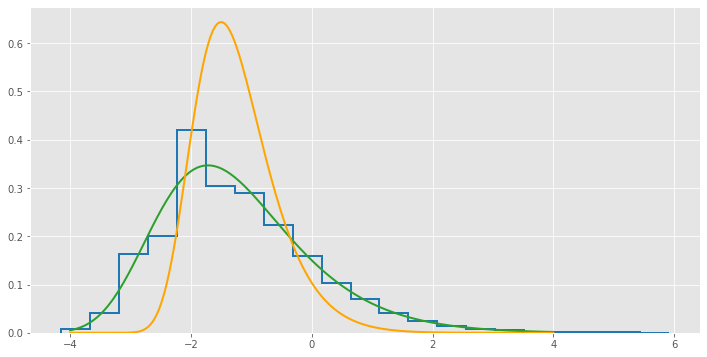

In [35]:
plt.figure(figsize = [12, 6])

plt.hist( d, bins = 21, histtype = 'step', density = True, lw = 2, color = 'tab:blue' )

x = np.linspace(-4, 4, 201)
plt.plot(
            x, stats.genextreme.pdf( x, shape, loc, scale ),
            '-', color = 'tab:green', lw = 2
        )

plt.plot(
            x, gev.pdf( x ),
            '-', color = 'orange', lw = 2
        )

plt.show()